### Exercise 4
#### Prof. Flamm
#### Spring 2020

1. The first objective of this exercise is to load your state dataset into this Jupyter notebook. In part, this exercise is intended to assure you that you will be able to work with your state's data on your laptop, and not need to change states at the last minute.

2. Next, I would like you to estimate some summary statistics describing the distributions of wage and salary incomes in 1990 and 2000, by educational level, in your state. These include the mean, median, and variance of , as well as the deciles, of wage and salary income for each educational level in the workforce. We will use this exercise to work on visualizations of the data we will be using in our individual project analysis.

Your dataset contains a 5% public use sample of wage and salary-earning adults in US households from the 1990 and 2000 U.S. Census within your state. I'm going to do Idaho, since nobody else picked it and I like baked potatos.

In [2]:
import sys as sys
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd                    # data package, redundant since already did
import matplotlib.pyplot as plt               # graphics package
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)

print(plt.style.available)
plt.style.use('fivethirtyeight')
%matplotlib inline 

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version:  1.0.1
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


#### 1. Please import your state's data set into this Jupyter notebook.

In [2]:
pd.set_option("display.max_columns", 101)

df=pd.read_stata('Pennsylvania.dta')
df

,index,conspuma,stfip,stname,perwt,age,male,married,speakeng,empstat,ind1990,age2,white,yr,lhs,hs,scol,col,logwage,logwage_w,locdchnmshare,locvul,locdt,locvul_noag,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
0,7365502,391,42,Pennsylvania,14,53,0,0,1,1,591,2809,1,1,0,1,0,0,9.510445,5.559201,0.016261,0.008693,-0.008106,0.008368,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,133,13499.996094
1,7365503,391,42,Pennsylvania,43,27,0,0,1,1,862,729,1,1,0,1,0,0,9.457200,5.585999,0.016261,0.008693,-0.008106,0.008368,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,211,12799.995117
2,7365500,391,42,Pennsylvania,14,52,1,1,1,1,702,2704,1,1,0,0,0,1,10.085809,6.134565,0.016261,0.008693,-0.008106,0.008368,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,167,23999.992188
3,7365501,391,42,Pennsylvania,18,51,0,1,1,1,842,2601,1,1,0,0,0,1,10.858999,7.195437,0.016261,0.008693,-0.008106,0.008368,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,205,52000.011719
4,7365499,391,42,Pennsylvania,21,47,0,1,1,1,922,2209,1,1,0,1,0,0,9.746834,5.795590,0.016261,0.008693,-0.008106,0.008368,-0.007788,0.0,0.0,0.0,0.0,0.0,0.0,0,228,17100.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418968,7778249,422,42,Pennsylvania,7,40,0,0,1,1,641,1600,1,0,1,0,0,0,9.210340,5.952244,0.010533,0.009782,-0.007547,0.009131,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,150,10000.000977
418969,7778248,422,42,Pennsylvania,7,57,1,1,1,1,831,3249,1,0,0,0,0,1,10.558414,8.073507,0.010533,0.009782,-0.007547,0.009131,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,201,38500.000000
418970,7778254,422,42,Pennsylvania,8,28,1,1,1,1,601,784,1,0,0,1,0,0,9.903487,6.437752,0.010533,0.009782,-0.007547,0.009131,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,136,19999.992188
418971,7778247,422,42,Pennsylvania,7,34,1,1,1,1,450,1156,1,0,0,1,0,0,10.012341,6.428823,0.010533,0.009782,-0.007547,0.009131,-0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0,103,22299.990234


In [8]:
df.dtypes

index              int32
conspuma           int32
stfip              int32
stname            object
perwt              int16
age                 int8
male                int8
married             int8
speakeng            int8
empstat             int8
ind1990            int16
age2               int16
white               int8
yr                  int8
lhs                 int8
hs                  int8
scol                int8
col                 int8
logwage          float32
logwage_w        float32
locdchnmshare    float32
locvul           float32
locdt            float32
locvul_noag      float32
locdt_noag       float32
mex_t90          float64
mex_dt           float32
mex_t90_noag     float32
mex_dt_noag      float32
mex_rca          float32
dchnmshare       float32
border              int8
ind                int16
incwage          float32
dtype: object

In [3]:
df.loc[df.yr==0,'incwage'] # yr==0 is 1990, yr==1 is 2000

1369      22999.992188
1371       8600.002930
1372      17117.001953
1373      13000.002930
1374       5782.999512
              ...     
418968    10000.000977
418969    38500.000000
418970    19999.992188
418971    22299.990234
418972    15000.001953
Name: incwage, Length: 201940, dtype: float32

#### Mini-tutorial: we need to weight observations because Census uses a *stratified* sample
###### each observation represents a random draw from a subpopulation with different numbers of people in underlying population


Fortunately, `statsmodels` can handle this situation. It contains a package called `DescrStatsW` (not the most user friendly name in the world) that does descriptive statistics and tests with weights for case weights--which is what we have. You give it the weights, and a dataframe, and it creates a weighted statistics object with methods for various useful descriptive statistics.

In [4]:
from statsmodels.stats.weightstats import DescrStatsW as dsw 
#wtd_inc=dsw(df.loc[:,'incwage'],weights=df.loc[:,'perwt']) # person-weight variable, get incwage var only
wtd_df=dsw(df,weights=df.loc[:,'perwt']) # person-weight variable, use entire dataframe
# perwt is the weights variable
type(wtd_df)

statsmodels.stats.weightstats.DescrStatsW

[DescrStatsW documentation link](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html)

In [5]:
# get person-weighted deciles of distribution of all variables in dataframe
wtd_df.quantile(np.arange(0,1.01,.1))

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
p,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7363676,391,42,Pennsylvania,1,25,0,0,0,1,10,625,0,0,0,0,0,0,0,-3.95124,0.00705733,0.00630161,-0.0250605,0.00596069,-0.0235241,0,-0.0675981,0,-0.0675981,0,-0.0281843,0,1,1
0.1,7421702,398,42,Pennsylvania,11,28,0,0,1,1,151,784,0,0,0,0,0,0,8.96954,5.23644,0.00750073,0.0100905,-0.016196,0.00914998,-0.0148885,0,-0.00190116,0,-0.00138946,0,0,0,28,7860
0.2,7460933,400,42,Pennsylvania,18,31,0,0,1,1,300,961,1,0,0,0,0,0,9.46498,5.62682,0.00759415,0.0100905,-0.0142045,0.00977386,-0.0122998,0,0,0,0,0,0,0,67,12900
0.3,7500629,404,42,Pennsylvania,21,35,0,0,1,1,410,1225,1,0,0,0,0,0,9.74097,5.86977,0.00950243,0.0109897,-0.0134721,0.0104094,-0.0121712,0,0,0,0,0,0,0,93,17000
0.4,7540222,407,42,Pennsylvania,25,38,0,1,1,1,580,1444,1,0,0,0,0,0,9.95228,6.04755,0.0120655,0.0126641,-0.0129257,0.0109377,-0.0111343,0,0,0,0,0,0,0,129,21000
0.5,7590651,409,42,Pennsylvania,25,41,1,1,1,1,641,1681,1,1,0,0,0,0,10.1266,6.21845,0.0130158,0.0134358,-0.0109886,0.0124252,-0.01062,0,0,0,0,0,0,0,150,25000
0.6,7624095,410,42,Pennsylvania,29,44,1,1,1,1,721,1936,1,1,0,1,0,0,10.309,6.3905,0.0132238,0.0141581,-0.0108546,0.0128775,-0.00958086,0,0,0,0,0,0,0,171,30000
0.7,7659090,412,42,Pennsylvania,32,47,1,1,1,1,831,2209,1,1,0,1,0,0,10.4631,6.56244,0.0150635,0.0150268,-0.00997729,0.0138335,-0.00939771,0,0,0,0,0,0,0,201,35000
0.8,7694751,414,42,Pennsylvania,35,51,1,1,1,1,842,2601,1,1,0,1,1,1,10.6454,6.76317,0.0150635,0.0168244,-0.00927504,0.0143848,-0.00896402,0,0,0,0,0.0531534,0.000767912,0,205,42000


In [23]:
df_qntls=wtd_df.quantile(np.arange(0,1.01,.1))
print(type(df_qntls)) # quantile method creates a dataframe
df_qntls.columns=df.columns # rename columns to meaningful variable names
df_qntls

<class 'pandas.core.frame.DataFrame'>


,index,conspuma,stfip,stname,perwt,age,male,married,speakeng,empstat,...,locdt_noag,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage
p,,,,,,,,,,,,,,,,,,,,,
0.0,2939125,97,16,Idaho,1,25,0,0,0,1,...,-0.0185405,0,-0.0675981,0,-0.0675981,0,-0.0281843,0,1,3
0.1,2943600,97,16,Idaho,11,28,0,0,1,1,...,-0.0185405,0,-0.00689625,0,-0.000923014,0,0,0,12,6000
0.2,2947745,97,16,Idaho,18,31,0,0,1,1,...,-0.0137596,0,0,0,0,0,0,0,48,10400
0.3,2951781,98,16,Idaho,22,34,0,1,1,1,...,-0.0131742,0,0,0,0,0,0,0,90,14500
0.4,2955551,99,16,Idaho,24,37,0,1,1,1,...,-0.0131742,0,0,0,0,0,0,0,122,18000
0.5,2959455,100,16,Idaho,28,40,1,1,1,1,...,-0.0131742,0,0,0,0,0,0,0,150,22000
0.6,2963128,101,16,Idaho,29,43,1,1,1,1,...,-0.0126156,0,0,0,0,0,0,0,170,26000
0.7,2965740,101,16,Idaho,32,47,1,1,1,1,...,-0.0117687,0,0,0,0,0,0,0,201,31000
0.8,2968330,101,16,Idaho,36,51,1,1,1,1,...,-0.0040505,0,0,0,0,0.0343306,0.00340579,0,205,38000


* 0 quantile = minimum (not affected by weighting)
* 1 quantile = maximum (not affected by weighting)
* .5 quantile = median (affected by weighting)

In [6]:
df.mex_dt_noag.describe() # describe unweighted variable

count    418973.000000
mean         -0.001675
std           0.006545
min          -0.067598
25%           0.000000
50%           0.000000
75%           0.000000
max           0.001239
Name: mex_dt_noag, dtype: float64

* How you can extract interesting [unweighted] quantile values as constants with pandas quantiles method:

In [7]:
dmin,d1,d2,d3,d4,d5,d6,d7,d8,d9,dmax=df['incwage'].quantile(np.arange(0,1.01,.1))
print(dmin,d1,d2,d3,d4,d5,d6,d7,d8,d9,dmax)

1.0 7499.99755859375 12000.0009765625 16600.005859375 19999.9921875 24699.9921875 29000.0 33999.98828125 40600.01171875 53999.984375 309999.875


* same trick can be made to work with statsmodels weighted quantiles:

In [8]:
wtd_incwage=dsw(df.loc[:,'incwage'],weights=df.loc[:,'perwt']) # person-weight variable
dmin,d1,d2,d3,d4,d5,d6,d7,d8,d9,dmax=wtd_incwage.quantile(np.arange(0,1.01,.1))
print(dmin,d1,d2,d3,d4,d5,d6,d7,d8,d9,dmax)
type(wtd_incwage)

1.0 7859.99755859375 12900.0048828125 17000.001953125 21000.009765625 24999.9921875 29999.990234375 35000.0 41999.99609375 56000.0234375 309999.875


statsmodels.stats.weightstats.DescrStatsW

* basic weighted descriptive statistics are available as *properties* of DescrStatsW object

In [9]:
print(wtd_incwage.mean,wtd_incwage.var,wtd_incwage.sum,wtd_incwage.sum_weights,wtd_incwage.nobs)

31491.87738320733 990626545.035259 264701227811.14062 8405381.0 8405381.0


* but weighted quantiles are a DescrStatsW *method*

In [10]:
wtd_incwage.quantile(np.arange(0,1.01,.1))

p
0.0         1.000000
0.1      7859.997559
0.2     12900.004883
0.3     17000.001953
0.4     21000.009766
0.5     24999.992188
0.6     29999.990234
0.7     35000.000000
0.8     41999.996094
0.9     56000.023438
1.0    309999.875000
dtype: float64

In [11]:
df.incwage.describe() # unweighted distribution, min and max match but not median

count    418973.000000
mean      30241.406250
std       29953.597656
min           1.000000
25%       14800.002930
50%       24699.992188
75%       36999.992188
max      309999.875000
Name: incwage, dtype: float64

In [12]:
#compare to unweighted quantiles
df.loc[:,'incwage'].quantile(np.arange(0,1.01,.1))

0.0         1.000000
0.1      7499.997559
0.2     12000.000977
0.3     16600.005859
0.4     19999.992188
0.5     24699.992188
0.6     29000.000000
0.7     33999.988281
0.8     40600.011719
0.9     53999.984375
1.0    309999.875000
Name: incwage, dtype: float64

> Actually, fairly close!

#### 2. Now, divide your state into 8 separate dataframes based on educational group and year (1990-yr==0, vs. 2000-yr==1):

In [3]:
id_df=pd.read_stata('Pennsylvania.dta')
id_df
main=id_df.drop('stname',axis=1) # DescrStatsW sometimes barfs if it eats a string variable
from statsmodels.stats.weightstats import DescrStatsW as dsw 

#This method is way better than the one I had been using!
main['educ']=0
main.loc[(main['lhs']==1),'educ']=1
main.loc[main.hs==1,'educ']=2
main.loc[main.scol==1,'educ']=3
main.loc[main.col==1,'educ']=4
print(main.educ.describe())
pd.crosstab(main.educ,main.yr,dropna=False,margins=True)

count    418973.000000
mean          2.655577
std           0.937176
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: educ, dtype: float64


yr,0,1,All
educ,,,
1,20325,12853,33178
2,91688,89772,181460
3,44440,56383,100823
4,45487,58025,103512
All,201940,217033,418973


#### This is the first time I really understood the importance of using dictionaries! Thank you 

In [6]:
# reference: https://stackoverflow.com/questions/50966466/convert-pandas-groupby-to-dict
moframes=dict(tuple(main.groupby(['educ','yr'])))
moframes[3,1]

,index,conspuma,stfip,perwt,age,male,married,speakeng,empstat,ind1990,...,mex_t90,mex_dt,mex_t90_noag,mex_dt_noag,mex_rca,dchnmshare,border,ind,incwage,educ
21,7365479,391,42,29,48,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,19999.992188,3
23,7365513,391,42,25,35,0,0,1,1,682,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,163,56000.023438,3
24,7365477,391,42,25,34,1,1,1,1,300,...,0.002216,-0.001901,0.002216,-0.001901,0.43626,0.087517,0,67,32999.988281,3
26,7365484,391,42,28,44,0,0,1,1,831,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,201,19100.003906,3
28,7365487,391,42,21,36,0,0,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,48600.007812,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418069,7779119,422,42,14,52,0,1,1,1,700,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,165,13200.001953,3
418072,7779122,422,42,11,51,1,0,1,1,842,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,205,46000.003906,3
418074,7779143,422,42,11,44,0,1,1,1,812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,196,18000.001953,3
418080,7779137,422,42,8,33,0,1,1,1,871,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0,214,15000.001953,3


#### 3. Now, report the following basic weighted descriptive statistics for each educational group/yr's `incwage`:
#### Mean

In [9]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd mean: educ= ',i,' yr= ',j,dsw(
            moframes[i,j].loc[:,'incwage'],weights=moframes[i,j].loc[:,'perwt']).mean)

incwage wtd mean: educ=  1  yr=  0 18270.16166218154
incwage wtd mean: educ=  1  yr=  1 23627.99677508502
incwage wtd mean: educ=  2  yr=  0 20267.502330341536
incwage wtd mean: educ=  2  yr=  1 27748.458350356916
incwage wtd mean: educ=  3  yr=  0 24847.86218996005
incwage wtd mean: educ=  3  yr=  1 33560.72703217617
incwage wtd mean: educ=  4  yr=  0 37393.026539097475
incwage wtd mean: educ=  4  yr=  1 55264.60916268397


#### Variance

In [11]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd variance: educ= ',i,' yr= ',j,dsw(
            moframes[i,j].loc[:,'incwage'],weights=moframes[i,j].loc[:,'perwt']).var)

incwage wtd variance: educ=  1  yr=  0 206967825.97012058
incwage wtd variance: educ=  1  yr=  1 588169766.1355953
incwage wtd variance: educ=  2  yr=  0 214929796.62233704
incwage wtd variance: educ=  2  yr=  1 465739076.741421
incwage wtd variance: educ=  3  yr=  0 352438252.56811154
incwage wtd variance: educ=  3  yr=  1 711917468.727108
incwage wtd variance: educ=  4  yr=  0 1000009267.3281235
incwage wtd variance: educ=  4  yr=  1 2851739368.231364


#### Median

In [12]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd median: educ= ',i,' yr= ',j,dsw(
            moframes[i,j].loc[:,'incwage'],weights=moframes[i,j].loc[:,'perwt']).quantile(.5))

incwage wtd median: educ=  1  yr=  0 p
0.5    15999.994141
dtype: float64
incwage wtd median: educ=  1  yr=  1 p
0.5    19999.992188
dtype: float64
incwage wtd median: educ=  2  yr=  0 p
0.5    18000.001953
dtype: float64
incwage wtd median: educ=  2  yr=  1 p
0.5    24999.992188
dtype: float64
incwage wtd median: educ=  3  yr=  0 p
0.5    21999.992188
dtype: float64
incwage wtd median: educ=  3  yr=  1 p
0.5    29999.990234
dtype: float64
incwage wtd median: educ=  4  yr=  0 p
0.5    30318.990234
dtype: float64
incwage wtd median: educ=  4  yr=  1 p
0.5    43000.015625
dtype: float64


#### 4. Now report the weighted deciles of `incwage` for each educational group and year within your state:

In [14]:
for i in [1,2,3,4]:
    for j in [0,1]:
        print('incwage wtd deciles: educ= ',i,' yr= ',j,dsw(
            moframes[i,j].loc[:,'incwage'],weights=moframes[i,j].loc[:,'perwt']).quantile(
            [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))


incwage wtd deciles: educ=  1  yr=  0 p
0.0         2.000000
0.1      4999.998047
0.2      8000.000977
0.3     10478.002930
0.4     13000.002930
0.5     15999.994141
0.6     18999.992188
0.7     21999.992188
0.8     26500.007812
0.9     32999.988281
1.0    194742.015625
dtype: float64
incwage wtd deciles: educ=  1  yr=  1 p
0.0         4.000000
0.1      5999.998047
0.2     10000.000977
0.3     13700.001953
0.4     16800.005859
0.5     19999.992188
0.6     23499.994141
0.7     27399.990234
0.8     32000.003906
0.9     40000.003906
1.0    309999.875000
dtype: float64
incwage wtd deciles: educ=  2  yr=  0 p
0.0         1.000000
0.1      5499.998047
0.2      9416.996094
0.3     12295.004883
0.4     15099.998047
0.5     18000.001953
0.6     21000.009766
0.7     24999.992188
0.8     29750.011719
0.9     35925.015625
1.0    194742.015625
dtype: float64
incwage wtd deciles: educ=  2  yr=  1 p
0.0         4.000000
0.1      8100.000977
0.2     13000.002930
0.3     17300.003906
0.4     21000.0097

#### 5. Now, please prepare a bar graph(s) contrasting the deciles of incwage for each of the educational groups within your state in 1990:

In [37]:
dec_ser_ed1_90=dsw(moframes[1,0].loc[:,'incwage'],weights=moframes[1,0].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed2_90=dsw(moframes[2,0].loc[:,'incwage'],weights=moframes[2,0].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed3_90=dsw(moframes[3,0].loc[:,'incwage'],weights=moframes[3,0].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed4_90=dsw(moframes[4,0].loc[:,'incwage'],weights=moframes[4,0].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_dict_90={'Less than High School':dec_ser_ed1_90,'High School':dec_ser_ed2_90,'Some College':dec_ser_ed3_90,'College':dec_ser_ed4_90}
decf_90=pd.DataFrame(dec_dict_90)
decf_90


,Less than High School,High School,Some College,College
p,,,,
0.1,4999.998047,5499.998047,6999.999512,10000.000977
0.2,8000.000977,9416.996094,12000.000977,17125.001953
0.3,10478.002930,12295.004883,15800.005859,22210.996094
0.4,13000.002930,15099.998047,18999.992188,26965.007812
0.5,15999.994141,18000.001953,21999.992188,30318.990234
0.6,18999.992188,21000.009766,24999.992188,35000.000000
0.7,21999.992188,24999.992188,29999.990234,40249.996094
0.8,26500.007812,29750.011719,34499.988281,50000.007812
0.9,32999.988281,35925.015625,41999.996094,65000.019531


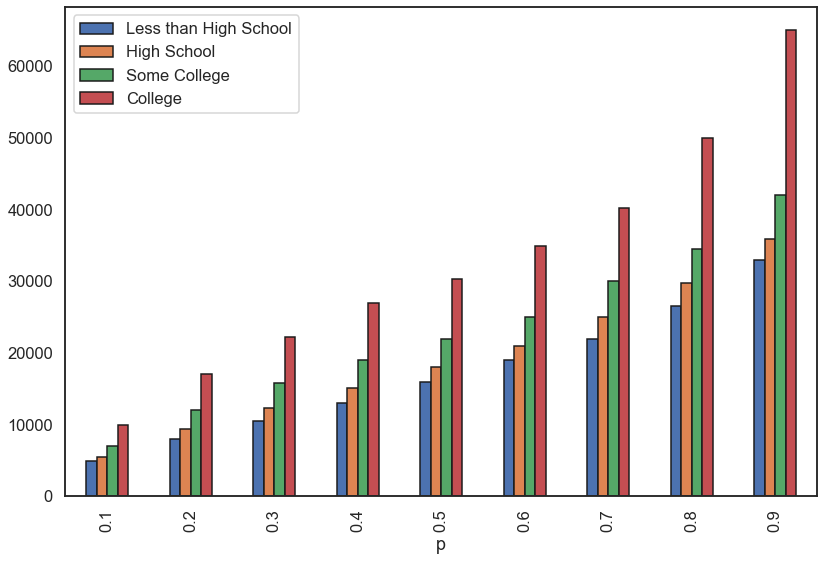

In [38]:
decf_90.plot(kind='bar',edgecolor='k',figsize=(12,9));

#### 5. Now, please prepare a bar graph(s) contrasting the deciles of incwage for each of the educational groups within your state in 2000:

In [39]:
dec_ser_ed1_00=dsw(moframes[1,1].loc[:,'incwage'],weights=moframes[1,1].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed2_00=dsw(moframes[2,1].loc[:,'incwage'],weights=moframes[2,1].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed3_00=dsw(moframes[3,1].loc[:,'incwage'],weights=moframes[3,1].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_ser_ed4_00=dsw(moframes[4,1].loc[:,'incwage'],weights=moframes[4,1].loc[:,'perwt']).quantile(
            [.1,.2,.3,.4,.5,.6,.7,.8,.9])
dec_dict_00={'Less than High School':dec_ser_ed1_00,'High School':dec_ser_ed2_00,'Some College':dec_ser_ed3_00,'College':dec_ser_ed4_00}
decf_00=pd.DataFrame(dec_dict_00)
decf_00

,Less than High School,High School,Some College,College
p,,,,
0.1,5999.998047,8100.000977,10000.000977,15000.001953
0.2,10000.000977,13000.002930,16600.005859,23999.992188
0.3,13700.001953,17300.003906,21000.009766,29999.990234
0.4,16800.005859,21000.009766,24999.992188,36999.992188
0.5,19999.992188,24999.992188,29999.990234,43000.015625
0.6,23499.994141,29000.000000,33999.988281,50000.007812
0.7,27399.990234,32999.988281,40000.003906,58999.984375
0.8,32000.003906,39700.003906,46000.003906,70000.031250
0.9,40000.003906,49000.011719,57000.003906,97999.976562


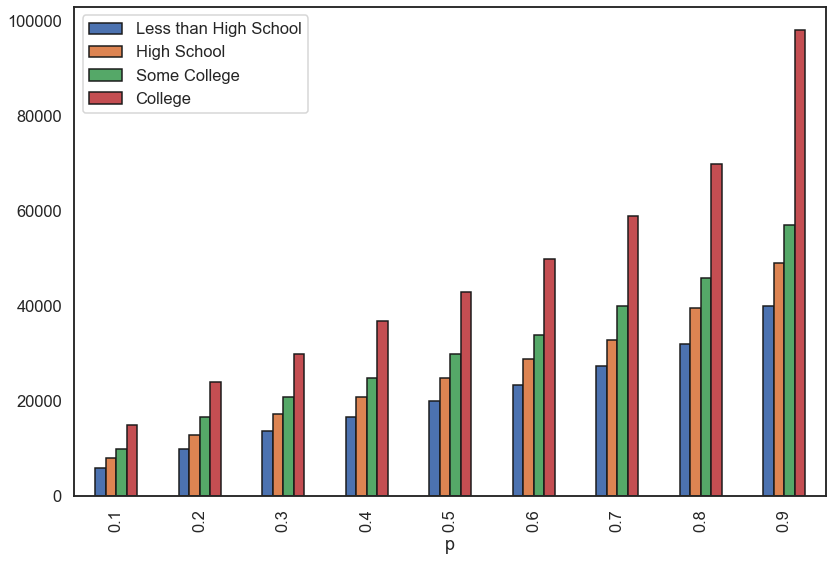

In [40]:
decf_00.plot(kind='bar',edgecolor='k',figsize=(12,9));


''

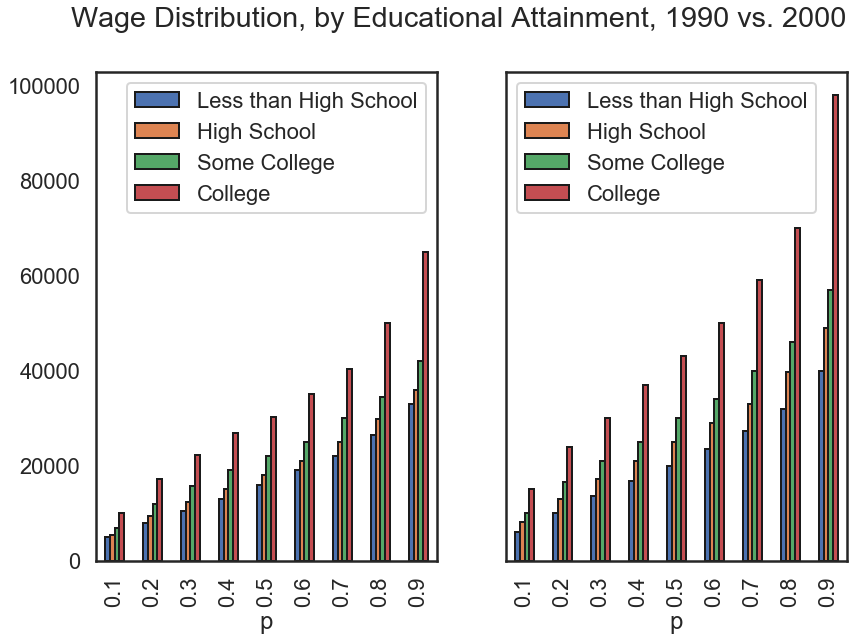

In [70]:
# combine two plots into two-column version
sns.set(style="white", context="talk")

fig,ax=plt.subplots(figsize=(12,9),nrows=1,ncols=2,sharex=True,sharey=True)
decf_90.plot(kind='bar',edgecolor='k',figsize=(12,9),ax=ax[0])
decf_00.plot(kind='bar',edgecolor='k',figsize=(12,9),ax=ax[1])
fig.suptitle('Wage Distribution, by Educational Attainment, 1990 vs. 2000')
;

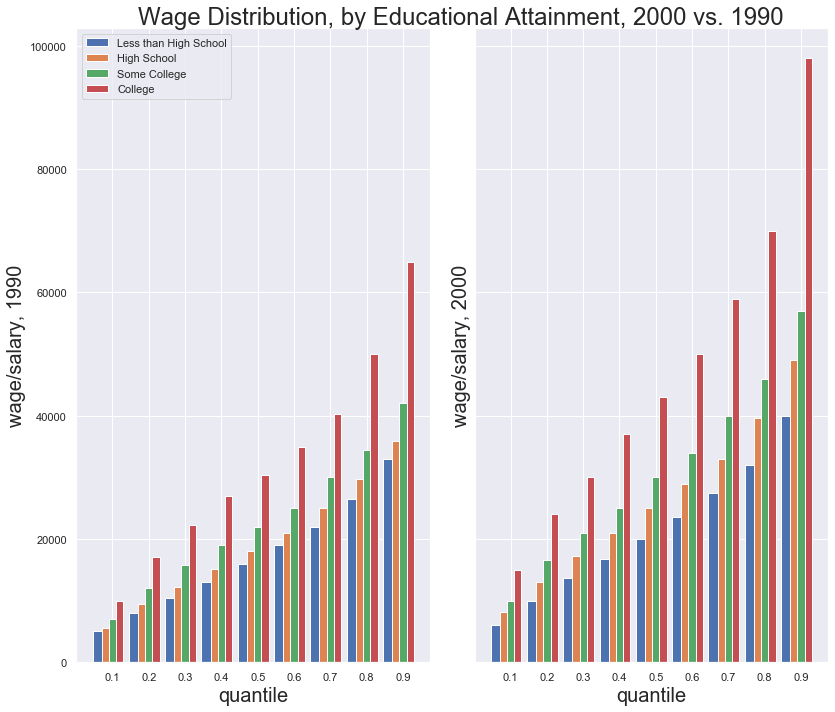

In [90]:
# barplot using object-oriented matplotlib methods

sns.set(style="darkgrid", context="notebook")
w=.04
x=decf_90.index

plt.rcParams.update({'font.size': 20})
fig,ax=plt.subplots(figsize=(12,10),nrows=1,ncols=2,sharex=True,sharey=True)

ax[0].bar(x-w/2,height=decf_90['Less than High School'],width=1.75*w)
ax[0].bar(x-w/4,height=decf_90['High School'],width=w)
ax[0].bar(x+w/4,height=decf_90['Some College'],width=w)
ax[0].bar(x+w/2,height=decf_90['College'],width=w/2)
ax[0].legend(labels = ['Less than High School','High School', 'Some College', 'College'],loc='upper left')
ax[0].set_xticks(x)

ax[0].set_xlabel('quantile', size = 20)
ax[0].set_ylabel('wage/salary, 1990', size = 20)

fig.suptitle('Wage Distribution, by Educational Attainment, 2000 vs. 1990', y=1, x = .55)
fig.set_tight_layout(True)
ax[1].bar(x-w/2,height=decf_00['Less than High School'],width=1.75*w)
ax[1].bar(x-w/4,height=decf_00['High School'],width=w)
ax[1].bar(x+w/4,height=decf_00['Some College'],width=w)
ax[1].bar(x+w/2,height=decf_00['College'],width=w/2)
ax[1].set_xticks(x)
ax[1].set_xlabel('quantile', size = 20)
ax[1].set_ylabel('wage/salary, 2000', size = 20);


plt.savefig('wage_dist_90-00.png')

In [91]:
import os

os.system('jupyter nbconvert --to html Exercise_4-(attempt2).ipynb')

0